### Load the libraries

In [137]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [138]:
d2 = pd.read_csv('data/D2.csv')

In [139]:
d2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[80-90),1,3,7,1,Invalid,33,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[70-80),1,3,5,3,Invalid,48,2,...,No,No,No,No,No,No,Steady,False,True,1
2,Caucasian,Female,[50-60),3,1,1,3,Orthopedics,25,1,...,No,No,No,No,No,No,Steady,False,True,0
3,AfricanAmerican,Female,[50-60),1,1,7,6,Invalid,41,0,...,No,No,No,No,No,No,Steady,False,True,1
4,AfricanAmerican,Male,[80-90),1,3,7,4,Invalid,22,0,...,No,No,No,No,No,No,Steady,False,True,1


In [140]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [141]:
d2_cluster = d2[['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital']]

In [142]:
d2_cluster

,num_lab_procedures,number_outpatient,number_inpatient,num_medications,time_in_hospital
0,33,0,1,14,1
1,48,0,2,7,3
2,25,0,0,15,3
3,41,0,0,19,6
4,22,0,1,12,4
...,...,...,...,...,...
19995,51,3,2,12,4
19996,57,3,5,28,9
19997,41,0,0,18,3
19998,49,0,5,15,3


### Data Preprocessing

#### Check for distributions of data to determine what transformations are needed

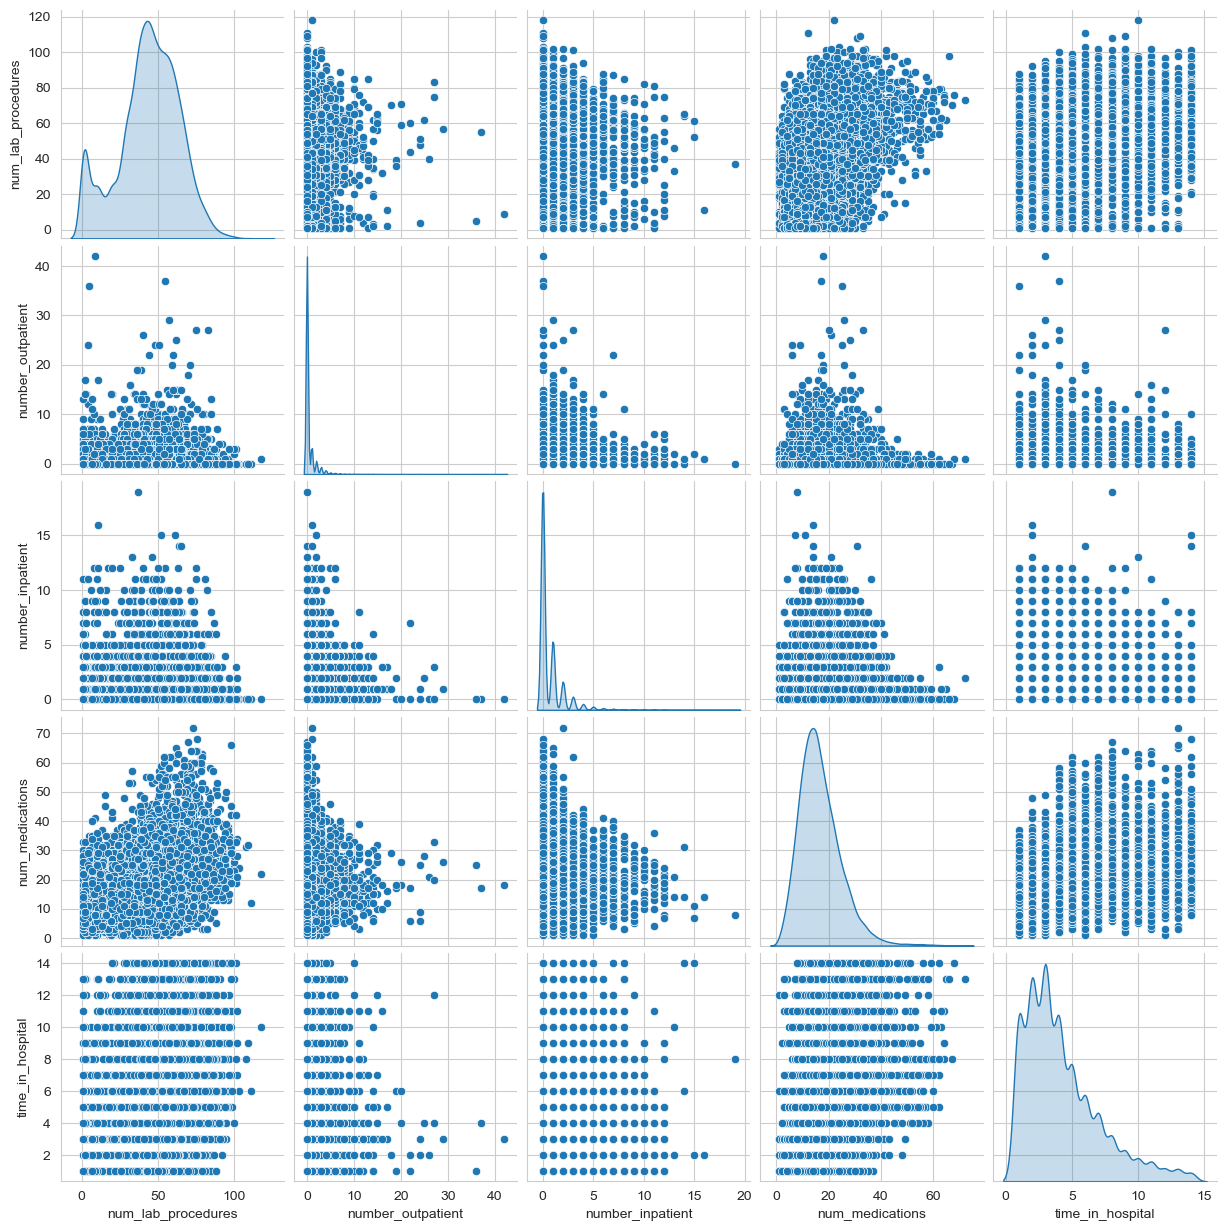

In [143]:
# seborn plot of the data to show the distribution of the data
sns.pairplot(d2_cluster, diag_kind='kde')
plt.show()

- num_lab_procedures and num_medications: These are roughly normally distributed, so no transformation is needed for these.
- number_outpatient and number_inpatient: These are still highly skewed with many zero values, making them good candidates for log or square root transformation.
- time_in_hospital: This feature is slightly skewed, but the need for transformation is optional.

In [144]:
d2_cluster['number_inpatient_log1p'] = np.log1p(d2_cluster['number_inpatient'])
d2_cluster['number_outpatient_log1p'] = np.log1p(d2_cluster['number_outpatient'])

C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_10928\2619345608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster['number_inpatient_log1p'] = np.log1p(d2_cluster['number_inpatient'])
C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_10928\2619345608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster['number_outpatient_log1p'] = np.log1p(d2_cluster['number_outpatient'])


#### Show the distributions after transformation

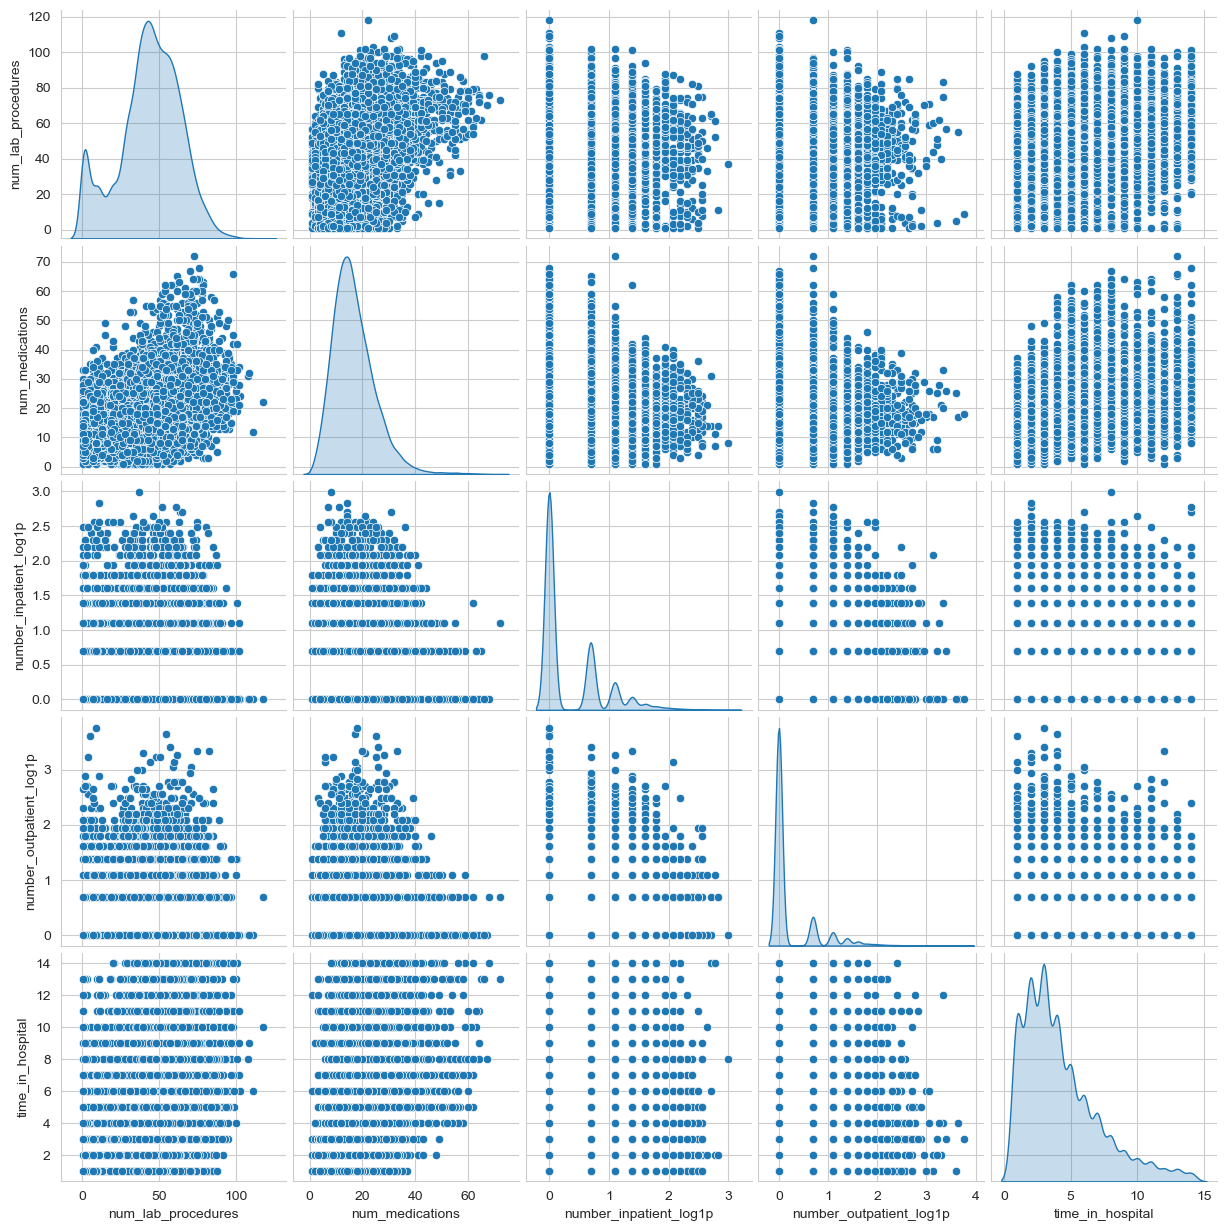

In [145]:
sns.pairplot(d2_cluster[['num_lab_procedures', 'num_medications', 'number_inpatient_log1p', 'number_outpatient_log1p',
                         'time_in_hospital']], diag_kind='kde')

In [146]:
d2_cluster.describe()

,num_lab_procedures,number_outpatient,number_inpatient,num_medications,time_in_hospital,number_inpatient_log1p,number_outpatient_log1p
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,43.743700,0.511950,0.701150,16.698200,4.226750,0.354498,0.231176
std,19.947812,1.544272,1.345745,8.049121,2.850428,0.530528,0.493157
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,11.000000,2.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,15.000000,3.000000,0.000000,0.000000
75%,58.000000,0.000000,1.000000,21.000000,6.000000,0.693147,0.000000
max,118.000000,42.000000,19.000000,72.000000,14.000000,2.995732,3.761200


In [147]:
d2_kmeans = d2_cluster[
    ['num_lab_procedures', 'num_medications', 'number_inpatient_log1p', 'number_outpatient_log1p', 'time_in_hospital']]

In [148]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
d2_scaled = standard_scaler.fit_transform(d2_kmeans)

In [149]:
d2_scaled = pd.DataFrame(d2_scaled, columns=d2_kmeans.columns)

In [150]:
d2_scaled

,num_lab_procedures,num_medications,number_inpatient_log1p,number_outpatient_log1p,time_in_hospital
0,-0.538604,-0.335225,0.638341,-0.468780,-1.132051
1,0.213377,-1.204907,1.402627,-0.468780,-0.430385
2,-0.939660,-0.210985,-0.668215,-0.468780,-0.430385
3,-0.137547,0.285976,-0.668215,-0.468780,0.622115
4,-1.090057,-0.583706,0.638341,-0.468780,-0.079551
...,...,...,...,...,...
19995,0.363773,-0.583706,1.402627,2.342352,-0.079551
19996,0.664566,1.404139,2.709183,2.342352,1.674615
19997,-0.137547,0.161736,-0.668215,-0.468780,-0.430385
19998,0.263509,-0.210985,2.709183,-0.468780,-0.430385


In [151]:
X = d2_scaled

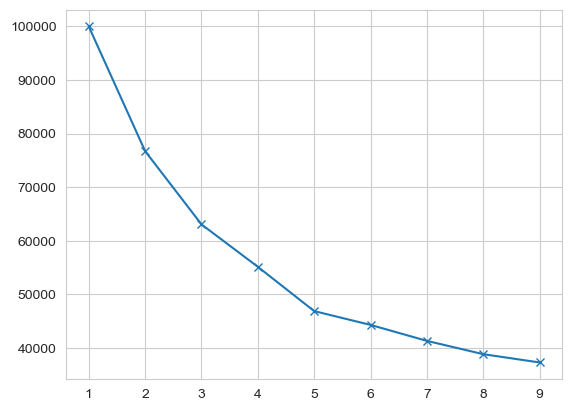

In [152]:
clusters = []
inertia_vals = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)

    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.plot(range(1, 10), inertia_vals, marker='x');

In [153]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for k=2 through k=5
silhouette_scores = {}

for k in range(2, 6):  # Focusing on k = 2, 3, 4, 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(d2_scaled)
    silhouette_avg = silhouette_score(d2_scaled, cluster_labels)
    silhouette_scores[k] = silhouette_avg

# Display the silhouette scores
silhouette_scores


{2: 0.2515470926600081,
 3: 0.27046945719420956,
 4: 0.20323460417346273,
 5: 0.23080718415838627}

In [154]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [155]:
print(f"Sum of intra-cluster distance: { model.inertia_:,.2f}")

Sum of intra-cluster distance: 63,044.63


In [156]:
features = d2[['num_lab_procedures', 'num_medications', 'number_inpatient', 'number_outpatient', 'time_in_hospital']].columns

In [157]:
centroids = model.cluster_centers_
# Creating a DataFrame with labels for centroids and feature names
cluster_labels = [f'Cluster {i+1}' for i in range(len(centroids))]
# feature_names = [f'Feature {i+1}' for i in range(len(centroids[0]))]

clusters_df = pd.DataFrame(centroids, index=cluster_labels, columns=features)
clusters_df.apply(lambda x: x.round(3))

,num_lab_procedures,num_medications,number_inpatient,number_outpatient,time_in_hospital
Cluster 1,-0.008,0.018,0.578,2.012,-0.141
Cluster 2,-0.364,-0.463,-0.217,-0.381,-0.514
Cluster 3,0.709,0.888,0.120,-0.308,1.070


In [163]:
d2_cluster = d2_cluster[['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital']]

In [164]:
y = model.predict(X)
d2_cluster.loc[:,'Cluster_ID'] = y

C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_10928\1054321607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:,'Cluster_ID'] = y


In [165]:
print("Cluster membership")
print(d2_cluster['Cluster_ID'].value_counts())

Cluster membership
Cluster_ID
1    11214
2     5785
0     3001
Name: count, dtype: int64


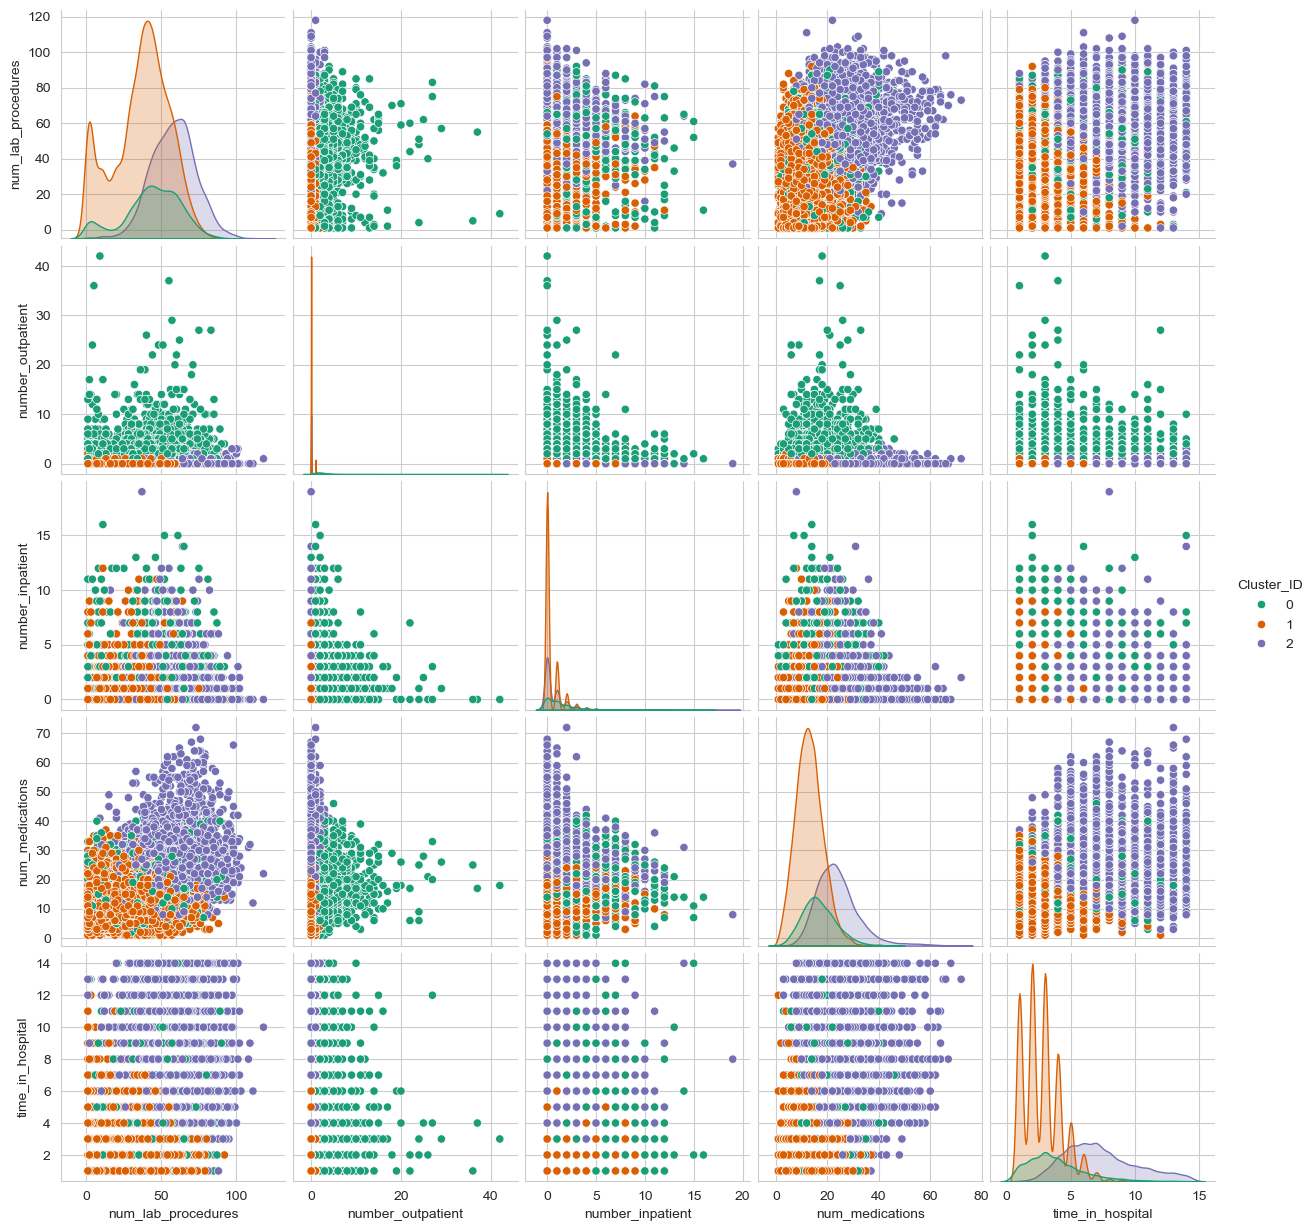

In [167]:
cluster_g = sns.pairplot(d2_cluster, hue='Cluster_ID', diag_kind='kde', palette='Dark2')
plt.show()

In [169]:
d2_age_cluster = d2[['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital', 'age']]

In [170]:
d2_age_cluster.loc[:, 'age'] = d2_age_cluster['age'].astype('str')

In [171]:
d2_age_cluster['age'].unique()

array(['[80-90)', '[70-80)', '[50-60)', '[40-50)', '[60-70)', '[90-100)',
       '[30-40)', '[10-20)', '[20-30)', '[0-10)'], dtype=object)

In [172]:
age_map = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7,
           '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}

In [173]:
d2_age_cluster.loc[:, 'age'] = d2_age_cluster['age'].map(age_map)

In [174]:
from kmodes.kprototypes import KPrototypes

In [175]:
d2_age_cluster = d2_kmeans[['num_lab_procedures', 'num_medications', 'number_inpatient_log1p', 'number_outpatient_log1p',
                             'time_in_hospital']].merge(d2_age_cluster['age'], left_index=True, right_index=True)

In [176]:
d2_age_cluster

,num_lab_procedures,num_medications,number_inpatient_log1p,number_outpatient_log1p,time_in_hospital,age
0,33,14,0.693147,0.000000,1,9
1,48,7,1.098612,0.000000,3,8
2,25,15,0.000000,0.000000,3,6
3,41,19,0.000000,0.000000,6,6
4,22,12,0.693147,0.000000,4,9
...,...,...,...,...,...,...
19995,51,12,1.098612,1.386294,4,8
19996,57,28,1.791759,1.386294,9,6
19997,41,18,0.000000,0.000000,3,9
19998,49,15,1.791759,0.000000,3,6


In [177]:
scaler = StandardScaler()

In [178]:
X = d2_age_cluster.to_numpy()

In [179]:
X = scaler.fit_transform(X)

In [180]:
X

array([[-0.53860386, -0.33522509,  0.63834098, -0.46878028, -1.13205122,
         1.15607496],
       [ 0.21337711, -1.20490696,  1.40262727, -0.46878028, -0.4303847 ,
         0.51801168],
       [-0.93966038, -0.21098482, -0.66821505, -0.46878028, -0.4303847 ,
        -0.75811489],
       ...,
       [-0.13754735,  0.16173598, -0.66821505, -0.46878028, -0.4303847 ,
         1.15607496],
       [ 0.26350917, -0.21098482,  2.7091833 , -0.46878028, -0.4303847 ,
        -0.75811489],
       [ 0.51416949, -0.33522509, -0.66821505,  1.75898962,  1.3237816 ,
         1.15607496]])

In [199]:
kproto = KPrototypes(n_clusters=3, random_state=42, n_jobs=10)
y = kproto.fit_predict(X, categorical=[5])


In [200]:
y

array([2, 2, 2, ..., 2, 2, 0], dtype=uint16)

In [201]:
d2_age_cluster.loc[:, 'Cluster_ID'] = y

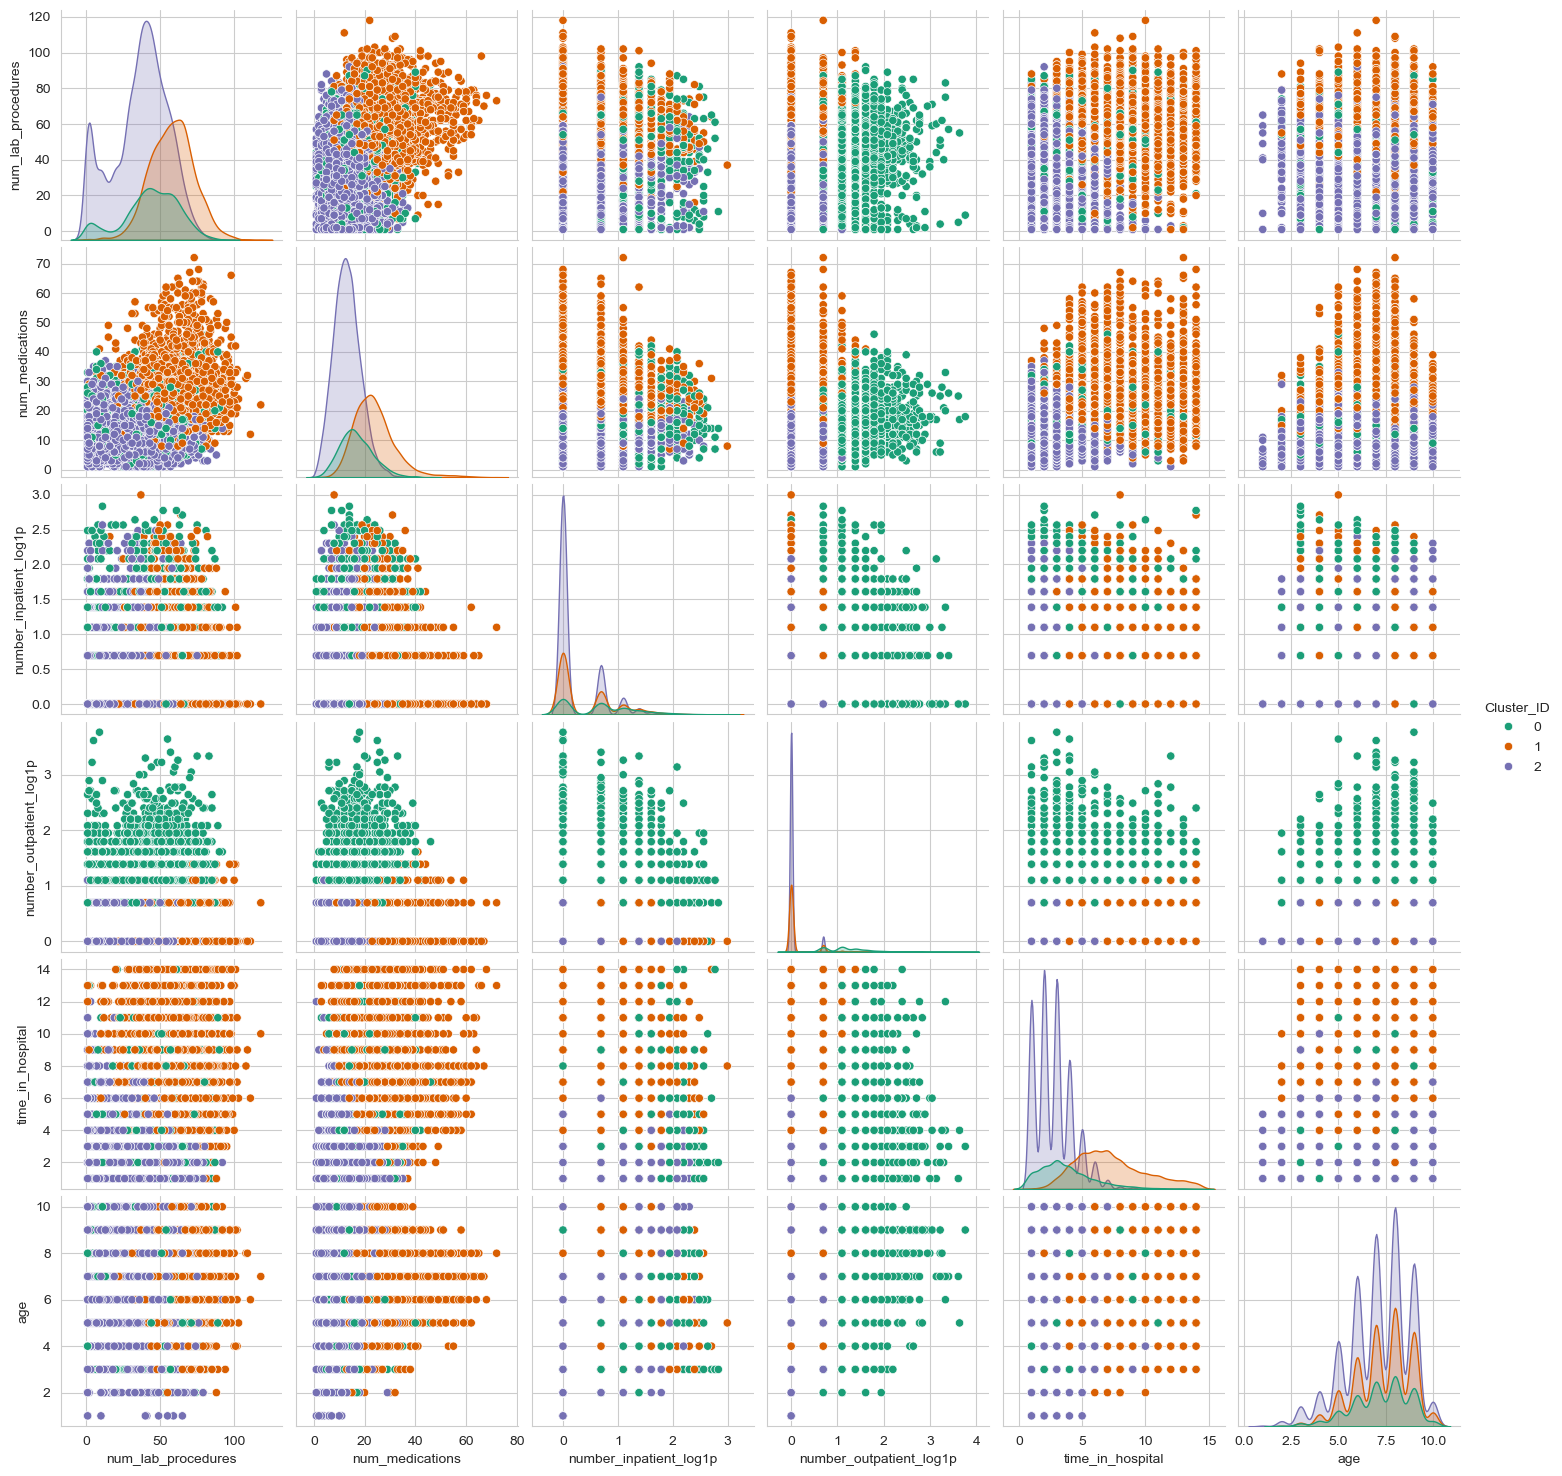

In [202]:
sns.pairplot(d2_age_cluster, hue='Cluster_ID', diag_kind='kde', palette='Dark2')

In [190]:
features = d2[['num_lab_procedures', 'num_medications', 'number_inpatient', 'number_outpatient', 'time_in_hospital', 'age']].columns

In [193]:
centroids = kproto.cluster_centers_
# Creating a DataFrame with labels for centroids and feature names
cluster_labels = [f'Cluster {i+1}' for i in range(len(centroids))]
# feature_names = [f'Feature {i+1}' for i in range(len(centroids[0]))]

clusters_df = pd.DataFrame(centroids, index=cluster_labels, columns=features)
clusters_df.apply(lambda x: x.round(3))

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

In [204]:
centroids = kproto.cluster_centroids_

In [222]:
numerical_centroids = centroids[:,:5]  # Numerical part of centroids
categorical_centroids = centroids[:,5]

In [229]:
numerical_centroids

array([[-0.01430744,  0.01378477,  0.60350556,  2.03231611, -0.14305821],
       [ 0.70946485,  0.88647087,  0.11463506, -0.30307845,  1.06828346],
       [-0.36163598, -0.46016085, -0.21723531, -0.37663851, -0.51268431]])

In [233]:
numerical_df = pd.DataFrame(numerical_centroids, columns=features[:5])


In [234]:
categorical_df = pd.DataFrame(categorical_centroids, columns=['age'])

In [269]:
centroid_df = pd.concat([numerical_df, categorical_df], axis=1)

In [270]:
centroid_df.apply(lambda x: x.round(3))

,num_lab_procedures,num_medications,number_inpatient,number_outpatient,time_in_hospital,age
0,-0.014,0.014,0.604,2.032,-0.143,0.518
1,0.709,0.886,0.115,-0.303,1.068,0.518
2,-0.362,-0.460,-0.217,-0.377,-0.513,0.518


In [268]:
d2_age_cluster.groupby('Cluster_ID')['age'].agg(lambda x: x.mode()[0])

Cluster_ID
0    8
1    8
2    8
Name: age, dtype: int64